In [16]:
#out-of-core learning (permette si addestrare il modello incrementalmente su batch più piccoli del dataset originale )
import numpy as np
import re
from nltk.corpus import stopwords
stop=stopwords.words('english')
def tokenizer(text): #puliamo i dati
    text=re.sub('<[^>]*>','',text)
    emoticons=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text=(re.sub('[\W]+', ' ',text.lower())+' '.join(emoticons).replace('-','')) #toglie inasi dalle emoticon da :-) a :)
    tokenized= [w for w in text.split() if w not in stop]
    return tokenized

def stream_docs(path): #leggiamo un documento alla volta
    with open(path, 'r', encoding='utf-8') as csv:
        next(csv) #skip header
        for line in csv:
            text, label= line[:-3], int(line[-2])
            yield text, label
       

In [17]:
#PRendiamo un solo documento
next(stream_docs(path='movie_data.csv')) #visualizza la prima riga del file csv formata da review (testo) e sentiment (classe=1)

('"Compared to the acclaimed Hollywood remake, this film is less flashy but much stronger at providing an overall picture of the drug problem. The remake loses the most interesting of the three plot threads, that of a farmer whose meager livelihood depends on drugs as a paying cash crop and whose increased involvement with the drug trade in an effort to better himself destroys himself and his family. Additionally, the story of the daughter\'s addiction goes into the problems not only of withdrawal but the high likelihood of relapse. This original miniseries makes good use of the additional time to go into the issues more thoroughly and remains stronger meat on this controversial subject."',
 1)

In [18]:
#Usiamo la funzione precedente per prelevare più documenti (batch del dataset orginale)
def get_minibatch(doc_stream, size):
    docs, y = [], []
    try:
        for _ in range (size):
            text, label=next(doc_stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
        return None, None
    return docs, y

In [19]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier

In [20]:
vect=HashingVectorizer(decode_error='ignore',
                      n_features=2**21,
                      preprocessor=None,
                      tokenizer=tokenizer)

In [21]:
clf=SGDClassifier(loss='log',
                 random_state=1,
                 n_iter=1)

In [22]:
doc_stream=stream_docs(path='movie_data.csv')

In [23]:
import pyprind
pbar= pyprind.ProgBar(45)
classes=np.array([0, 1])
for _ in range (45): #creiamo 45 mini batch da 1000 documenti e per ogni mini batch addestriamo il modello
    X_train, y_train= get_minibatch(doc_stream, size=1000)
    if not X_train:
        break
    X_train= vect.transform(X_train)
    clf.partial_fit(X_train, y_train, classes=classes)
    pbar.update()


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:36


In [24]:
#usiamo gli ultimi 5000 documenti per testare l'algoritmo
X_test, y_test = get_minibatch(doc_stream, size=5000)
X_test=vect.transform(X_test)
print('Accuratezza: %.3f' % clf.score(X_test, y_test))

Accuratezza: 0.874


In [25]:
clf=clf.partial_fit(X_test,y_test)
print('Accuratezza: %.3f' % clf.score(X_test, y_test))

Accuratezza: 0.891


In [26]:
#l'accuratezza è migliorata. Anche se è inferiore a quella del metodo tradizionale (0.891 vs 0.901), è comunque buona e richiede molto meno tempo (1 min contro 137).

In [27]:
import pickle
import os

In [28]:
#creiamo una directory movieclassifier dove poter salvare i file delle stopwords e il classificatore
dest=os.path.join('movieclassifier', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)

In [29]:
#serializziamo le stopwords. wb apre il file in modalità binaria e protocol=4 è il protocollo più efficiente
pickle.dump(stop, open(os.path.join(dest, 'stopwords.pkl'),'wb'), protocol=4)

In [30]:
#serializziamo il classificatore
pickle.dump(clf, open(os.path.join(dest, 'classifier.pkl'), 'wb'), protocol=4)

In [31]:
#Hashingvectorizer non va picklato perchè non va fittato

In [32]:
#creiamo il file vectorizer.py nella directory movieclassifier

In [33]:
#creaimo il file test_vect per deserializzare il classificatore e testarlo
#da console nella cartella movieclassifire eseguiamo:
#python3 vectorizer.py
#python3 test_vect.py
#Predizione: positiva
#Probabilità= 83.77%

In [34]:
#creiamo un database per le recensioni
#python3 create_db.py

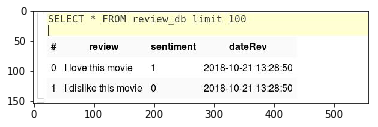

In [42]:
#per visualizzare il database si può usare l'estensione firefoxsqlite-manager
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/home/ivan/data_science/ML/movieclassifier/sqlitemanager.jpeg')

imgplot = plt.imshow(img)
plt.show()

In [43]:
#creiamo la directoty 1st_flask_app_1 con l'applicazione app.py e first_app.html 
#python3 app.py
#pagina visibile su http://127.0.0.1:5000/

In [44]:
#eseguite prime due app in Flask

In [45]:
#eseguita moviereview app